In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/maratonadev/desafio-5-2021/main/assets/data/dataset.csv')

In [3]:
df_backup = df

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4548 entries, 0 to 4547
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                4548 non-null   int64  
 1   GENDER            4520 non-null   object 
 2   SENIORCITIZEN     4523 non-null   float64
 3   PARTNER           4524 non-null   object 
 4   DEPENDENTS        4526 non-null   object 
 5   TENURE            4533 non-null   float64
 6   PHONESERVICE      4520 non-null   object 
 7   MULTIPLELINES     4523 non-null   object 
 8   INTERNETSERVICE   4524 non-null   object 
 9   ONLINESECURITY    4518 non-null   object 
 10  ONLINEBACKUP      4518 non-null   object 
 11  DEVICEPROTECTION  4524 non-null   object 
 12  TECHSUPPORT       4530 non-null   object 
 13  STREAMINGTV       4523 non-null   object 
 14  STREAMINGMOVIES   4523 non-null   object 
 15  CONTRACT          4525 non-null   object 
 16  PAPERLESSBILLING  4517 non-null   object 


In [5]:
df.describe()

,ID,SENIORCITIZEN,TENURE,MONTHLYCHARGES
count,4548.000000,4523.000000,4533.000000,4527.000000
mean,5478.833773,0.163608,31.812927,95.836351
std,2608.431590,0.369961,24.419055,75.492469
min,1004.000000,0.000000,0.000000,0.090000
25%,3224.750000,0.000000,8.000000,34.645000
50%,5455.500000,0.000000,28.000000,73.530000
75%,7732.250000,0.000000,54.000000,143.595000
max,9999.000000,1.000000,72.000000,345.240000


In [6]:
df.shape

(4548, 21)

In [7]:
df.columns

Index(['ID', 'GENDER', 'SENIORCITIZEN', 'PARTNER', 'DEPENDENTS', 'TENURE',
       'PHONESERVICE', 'MULTIPLELINES', 'INTERNETSERVICE', 'ONLINESECURITY',
       'ONLINEBACKUP', 'DEVICEPROTECTION', 'TECHSUPPORT', 'STREAMINGTV',
       'STREAMINGMOVIES', 'CONTRACT', 'PAPERLESSBILLING', 'PAYMENTMETHOD',
       'MONTHLYCHARGES', 'TOTALCHARGES', 'CHURN'],
      dtype='object')

In [8]:
df.head(10)

,ID,GENDER,SENIORCITIZEN,PARTNER,DEPENDENTS,TENURE,PHONESERVICE,MULTIPLELINES,INTERNETSERVICE,ONLINESECURITY,ONLINEBACKUP,DEVICEPROTECTION,TECHSUPPORT,STREAMINGTV,STREAMINGMOVIES,CONTRACT,PAPERLESSBILLING,PAYMENTMETHOD,MONTHLYCHARGES,TOTALCHARGES,CHURN
0,3418,Female,0.0,No,No,26.0,Yes,No,DSL,No,Yes,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),131.55,1483.7,No
1,6865,Male,0.0,No,No,39.0,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),79.61,2737.31,No
2,2799,Male,0.0,No,No,1.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),9.26,9.26,No
3,1584,Male,0.0,Yes,Yes,66.0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),42.14,1689.19,No
4,9997,Male,0.0,No,No,56.0,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,No,Electronic check,126.24,5608.69,No
5,2457,Female,1.0,Yes,No,3.0,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,104.39,248.04,Yes
6,4737,Male,0.0,Yes,No,14.0,Yes,No,DSL,No,No,Yes,No,No,No,Month-to-month,No,Credit card (automatic),119.17,737.82,No
7,9704,Male,0.0,Yes,No,72.0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,5.26,1776.96,No
8,5901,Female,0.0,No,No,28.0,Yes,Yes,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,29.61,1625.06,No
9,7504,Female,0.0,Yes,No,54.0,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,No,Electronic check,292.52,6075.32,Yes


In [9]:
df[df['GENDER'].isna()]

,ID,GENDER,SENIORCITIZEN,PARTNER,DEPENDENTS,TENURE,PHONESERVICE,MULTIPLELINES,INTERNETSERVICE,ONLINESECURITY,ONLINEBACKUP,DEVICEPROTECTION,TECHSUPPORT,STREAMINGTV,STREAMINGMOVIES,CONTRACT,PAPERLESSBILLING,PAYMENTMETHOD,MONTHLYCHARGES,TOTALCHARGES,CHURN
64,3892,NaN,0.0,No,Yes,19.0,Yes,No,DSL,Yes,Yes,Yes,No,No,No,Month-to-month,Yes,Electronic check,42.37,1279.57,No
163,1344,NaN,0.0,Yes,No,30.0,Yes,No,DSL,No,No,Yes,No,No,No,Month-to-month,Yes,Mailed check,89.10,1514.0,No
196,1287,NaN,1.0,No,No,41.0,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,114.06,4203.41,Yes
354,6338,NaN,1.0,No,No,9.0,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,11.98,650.98,No
767,1132,NaN,0.0,No,No,69.0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,NaN,No internet service,Two year,No,Bank transfer (automatic),54.27,1743.42,No
852,3200,NaN,0.0,No,No,12.0,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,159.48,990.03,No
857,4790,NaN,0.0,No,No,12.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,7.80,217.25,No
964,1413,NaN,0.0,No,No,70.0,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,No,No,One year,Yes,Bank transfer (automatic),24.18,6319.88,No
1058,4115,NaN,0.0,Yes,No,59.0,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,One year,No,Electronic check,220.83,5219.93,Yes
1207,3784,NaN,0.0,Yes,Yes,23.0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,57.72,644.07,No


In [10]:
df['PHONESERVICE'].isna().sum()

28

In [11]:
df[['SENIORCITIZEN']] = df[['SENIORCITIZEN']].fillna(df[['SENIORCITIZEN']].mode().iloc[0])

In [12]:
for item in df.columns:
  if len(df[item].unique()) < 4:
    print(item,':',df[item].unique())

GENDER : ['Female' 'Male' nan]
SENIORCITIZEN : [0. 1.]
PARTNER : ['No' 'Yes' nan]
DEPENDENTS : ['No' 'Yes' nan]
PHONESERVICE : ['Yes' 'No' nan]
PAPERLESSBILLING : ['Yes' 'No' nan]
CHURN : ['No' 'Yes']


In [13]:
# MOSTRAR A QUANTIDADE DE MISSING VALUE
df['GENDER'].isna().sum()

28

In [14]:
#MISSING VALUES GENDER FILL WITH MODE (FREQUENT)
df[['GENDER']] = df[['GENDER']].fillna(df[['GENDER']].mode().iloc[0])

In [15]:
#MISSING VALUES PARTNER FILL WITH MODE (FREQUENT)
df[['PARTNER']] = df[['PARTNER']].fillna(df[['PARTNER']].mode().iloc[0])

In [16]:
df['ONLINESECURITY'] = df['ONLINESECURITY'].replace('No internet service', 'No')

In [17]:
df['MULTIPLELINES'] = df['MULTIPLELINES'].replace('No phone service', 'No')

In [18]:
#MISSING VALUES PARTNER FILL WITH MODE (FREQUENT)
df[['DEPENDENTS']] = df[['DEPENDENTS']].fillna(df[['DEPENDENTS']].mode().iloc[0])
#PHONESERVICE 
df[['PHONESERVICE']] = df[['PHONESERVICE']].fillna(df[['PHONESERVICE']].mode().iloc[0])
#PAPERLESSBILLING 
df[['PAPERLESSBILLING']] = df[['PAPERLESSBILLING']].fillna(df[['PAPERLESSBILLING']].mode().iloc[0])

for item in ['MULTIPLELINES','INTERNETSERVICE','ONLINESECURITY']:
  df[[item]] = df[[item]].fillna(df[[item]].mode().iloc[0])

In [19]:
df.columns

Index(['ID', 'GENDER', 'SENIORCITIZEN', 'PARTNER', 'DEPENDENTS', 'TENURE',
       'PHONESERVICE', 'MULTIPLELINES', 'INTERNETSERVICE', 'ONLINESECURITY',
       'ONLINEBACKUP', 'DEVICEPROTECTION', 'TECHSUPPORT', 'STREAMINGTV',
       'STREAMINGMOVIES', 'CONTRACT', 'PAPERLESSBILLING', 'PAYMENTMETHOD',
       'MONTHLYCHARGES', 'TOTALCHARGES', 'CHURN'],
      dtype='object')

In [20]:
df[['GENDER', 'SENIORCITIZEN', 'PARTNER', 'DEPENDENTS',
       'PHONESERVICE', 'MULTIPLELINES', 'INTERNETSERVICE', 'ONLINESECURITY',
       'ONLINEBACKUP', 'DEVICEPROTECTION', 'TECHSUPPORT', 'STREAMINGTV',
       'STREAMINGMOVIES', 'CONTRACT', 'PAPERLESSBILLING', 'PAYMENTMETHOD']] = df[['GENDER', 'SENIORCITIZEN', 'PARTNER', 'DEPENDENTS',
       'PHONESERVICE', 'MULTIPLELINES', 'INTERNETSERVICE', 'ONLINESECURITY',
       'ONLINEBACKUP', 'DEVICEPROTECTION', 'TECHSUPPORT', 'STREAMINGTV',
       'STREAMINGMOVIES', 'CONTRACT', 'PAPERLESSBILLING', 'PAYMENTMETHOD', ]].astype('category')

In [21]:
df['CHURN'].unique()

array(['No', 'Yes'], dtype=object)

In [22]:
churn = {'Yes':1, 'No':0}
df['CHURN']= df['CHURN'].replace(churn)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4548 entries, 0 to 4547
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   ID                4548 non-null   int64   
 1   GENDER            4548 non-null   category
 2   SENIORCITIZEN     4548 non-null   category
 3   PARTNER           4548 non-null   category
 4   DEPENDENTS        4548 non-null   category
 5   TENURE            4533 non-null   float64 
 6   PHONESERVICE      4548 non-null   category
 7   MULTIPLELINES     4548 non-null   category
 8   INTERNETSERVICE   4548 non-null   category
 9   ONLINESECURITY    4548 non-null   category
 10  ONLINEBACKUP      4518 non-null   category
 11  DEVICEPROTECTION  4524 non-null   category
 12  TECHSUPPORT       4530 non-null   category
 13  STREAMINGTV       4523 non-null   category
 14  STREAMINGMOVIES   4523 non-null   category
 15  CONTRACT          4525 non-null   category
 16  PAPERLESSBILLING  4548 n

In [24]:
#df['TENURE']=df['TENURE'].astype('int64')
df.isna().sum()

ID                   0
GENDER               0
SENIORCITIZEN        0
PARTNER              0
DEPENDENTS           0
TENURE              15
PHONESERVICE         0
MULTIPLELINES        0
INTERNETSERVICE      0
ONLINESECURITY       0
ONLINEBACKUP        30
DEVICEPROTECTION    24
TECHSUPPORT         18
STREAMINGTV         25
STREAMINGMOVIES     25
CONTRACT            23
PAPERLESSBILLING     0
PAYMENTMETHOD       28
MONTHLYCHARGES      21
TOTALCHARGES        21
CHURN                0
dtype: int64

In [25]:
df['ONLINEBACKUP'].unique()
df['ONLINEBACKUP'] = df['ONLINEBACKUP'].replace('No internet service','No')

In [26]:
df['CONTRACT'].unique()

['Month-to-month', 'Two year', 'One year', NaN]
Categories (3, object): ['Month-to-month', 'Two year', 'One year']

In [27]:
df['MONTHLYCHARGES'].unique()
df[['MONTHLYCHARGES']] = df[['MONTHLYCHARGES']].fillna(df[['MONTHLYCHARGES']].mean())

In [28]:
df[['TENURE']] = df[['TENURE']].fillna(df[['TENURE']].mean())

In [29]:
df['TOTALCHARGES'] = pd.to_numeric(df['TOTALCHARGES'], downcast='float', errors='coerce')
df[['TOTALCHARGES']] = df[['TOTALCHARGES']].fillna(df[['TOTALCHARGES']].mean())

In [30]:
df['PAYMENTMETHOD'].unique()

['Credit card (automatic)', 'Electronic check', 'Mailed check', 'Bank transfer (automatic)', NaN]
Categories (4, object): ['Credit card (automatic)', 'Electronic check', 'Mailed check',
                         'Bank transfer (automatic)']

In [31]:
df['DEVICEPROTECTION'].unique()

['Yes', 'No', 'No internet service', NaN]
Categories (3, object): ['Yes', 'No', 'No internet service']

In [32]:
df['DEVICEPROTECTION'] = df['DEVICEPROTECTION'].replace('No internet service','No')

In [33]:
#TECHSUPPORT
df['TECHSUPPORT'].unique()

['No', 'No internet service', 'Yes', NaN]
Categories (3, object): ['No', 'No internet service', 'Yes']

In [34]:
df['TECHSUPPORT'] = df['TECHSUPPORT'].replace('No internet service','No')

In [35]:
df['STREAMINGTV'].unique()
df['STREAMINGTV'] = df['STREAMINGTV'].replace('No internet service','No')

In [36]:
df['STREAMINGMOVIES'].unique()
df['STREAMINGMOVIES'] = df['STREAMINGMOVIES'].replace('No internet service','No')

In [37]:
for item in ['ONLINEBACKUP','DEVICEPROTECTION','TECHSUPPORT','STREAMINGTV','STREAMINGMOVIES','CONTRACT','PAYMENTMETHOD']:
  df[[item]] = df[[item]].fillna(df[[item]].mode().iloc[0])

In [38]:
# Delete using drop() 
dfdrop = df.drop(['ID'], axis=1)

In [60]:
dfdrop

,SENIORCITIZEN,PARTNER,DEPENDENTS,TENURE,PHONESERVICE,MULTIPLELINES,INTERNETSERVICE,ONLINESECURITY,ONLINEBACKUP,DEVICEPROTECTION,TECHSUPPORT,STREAMINGTV,STREAMINGMOVIES,CONTRACT,PAPERLESSBILLING,PAYMENTMETHOD,MONTHLYCHARGES,TOTALCHARGES,CHURN
0,0.0,No,No,2,Yes,No,DSL,No,Yes,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),2,1,0
1,0.0,No,No,3,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),2,2,0
2,0.0,No,No,1,Yes,No,No,No,No,No,No,No,No,Month-to-month,No,Credit card (automatic),1,1,0
3,0.0,Yes,Yes,5,Yes,Yes,No,No,No,No,No,No,No,Two year,Yes,Credit card (automatic),1,1,0
4,0.0,No,No,4,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,No,Electronic check,2,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4543,0.0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,1,1,0
4544,0.0,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Electronic check,3,1,1
4545,0.0,No,No,2,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),1,1,0
4546,0.0,Yes,Yes,4,Yes,Yes,No,No,No,No,No,No,No,Two year,Yes,Credit card (automatic),1,1,0


In [40]:
dfdrop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4548 entries, 0 to 4547
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   GENDER            4548 non-null   category
 1   SENIORCITIZEN     4548 non-null   category
 2   PARTNER           4548 non-null   category
 3   DEPENDENTS        4548 non-null   category
 4   TENURE            4548 non-null   float64 
 5   PHONESERVICE      4548 non-null   category
 6   MULTIPLELINES     4548 non-null   category
 7   INTERNETSERVICE   4548 non-null   category
 8   ONLINESECURITY    4548 non-null   category
 9   ONLINEBACKUP      4548 non-null   category
 10  DEVICEPROTECTION  4548 non-null   category
 11  TECHSUPPORT       4548 non-null   category
 12  STREAMINGTV       4548 non-null   category
 13  STREAMINGMOVIES   4548 non-null   category
 14  CONTRACT          4548 non-null   category
 15  PAPERLESSBILLING  4548 non-null   category
 16  PAYMENTMETHOD     4548 n

In [41]:
#agrupar e ver a mean (média  ) em relação ao churn
for item in dfdrop.columns:
  if item != 'CHURN' and item != 'TOTALCHARGES' and item != 'MONTHLYCHARGES' and item != 'TENURE':
    print(dfdrop[[item,'CHURN']].groupby([item]).mean())
# descartar gender

           CHURN
GENDER          
Female  0.274344
Male    0.258373
                  CHURN
SENIORCITIZEN          
0.0            0.235294
1.0            0.425676
            CHURN
PARTNER          
No       0.329065
Yes      0.199546
               CHURN
DEPENDENTS          
No          0.311076
Yes         0.159345
                 CHURN
PHONESERVICE          
No            0.256098
Yes           0.267279
                  CHURN
MULTIPLELINES          
No             0.254998
Yes            0.282024
                    CHURN
INTERNETSERVICE          
DSL              0.186441
Fiber optic      0.420297
No               0.076459
                   CHURN
ONLINESECURITY          
No              0.310597
Yes             0.151108
                 CHURN
ONLINEBACKUP          
No            0.290705
Yes           0.217305
                     CHURN
DEVICEPROTECTION          
No                0.286713
Yes               0.226537
                CHURN
TECHSUPPORT          
No           0.311

In [42]:
print(dfdrop[['TENURE','CHURN']].groupby(['TENURE']).mean())

           CHURN
TENURE          
0.0     0.000000
1.0     0.600490
2.0     0.496644
3.0     0.437500
4.0     0.456140
...          ...
68.0    0.080645
69.0    0.114754
70.0    0.077922
71.0    0.028302
72.0    0.013393

[74 rows x 1 columns]


In [43]:
dfr=dfdrop

In [44]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4548 entries, 0 to 4547
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   GENDER            4548 non-null   category
 1   SENIORCITIZEN     4548 non-null   category
 2   PARTNER           4548 non-null   category
 3   DEPENDENTS        4548 non-null   category
 4   TENURE            4548 non-null   float64 
 5   PHONESERVICE      4548 non-null   category
 6   MULTIPLELINES     4548 non-null   category
 7   INTERNETSERVICE   4548 non-null   category
 8   ONLINESECURITY    4548 non-null   category
 9   ONLINEBACKUP      4548 non-null   category
 10  DEVICEPROTECTION  4548 non-null   category
 11  TECHSUPPORT       4548 non-null   category
 12  STREAMINGTV       4548 non-null   category
 13  STREAMINGMOVIES   4548 non-null   category
 14  CONTRACT          4548 non-null   category
 15  PAPERLESSBILLING  4548 non-null   category
 16  PAYMENTMETHOD     4548 n

In [45]:
import numpy as np
#dfr['TENURE']= dfr['TENURE'].astype('category')
dfr['TENURE'] = pd.cut(dfr['TENURE'], bins=5, labels=np.arange(1, 6, 1))
dfr[['TENURE','CHURN']].groupby(['TENURE']).mean()

,CHURN
TENURE,
1,0.456606
2,0.290280
3,0.204301
4,0.138614
5,0.071285


In [46]:
dfr['MONTHLYCHARGES'] = pd.cut(dfr['MONTHLYCHARGES'], bins=5, labels=np.arange(1, 6, 1))

In [47]:
#TOTALCHARGES
dfr['TOTALCHARGES'] = pd.cut(dfr['TOTALCHARGES'], bins=5, labels=np.arange(1, 6, 1))

In [48]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4548 entries, 0 to 4547
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   GENDER            4548 non-null   category
 1   SENIORCITIZEN     4548 non-null   category
 2   PARTNER           4548 non-null   category
 3   DEPENDENTS        4548 non-null   category
 4   TENURE            4548 non-null   category
 5   PHONESERVICE      4548 non-null   category
 6   MULTIPLELINES     4548 non-null   category
 7   INTERNETSERVICE   4548 non-null   category
 8   ONLINESECURITY    4548 non-null   category
 9   ONLINEBACKUP      4548 non-null   category
 10  DEVICEPROTECTION  4548 non-null   category
 11  TECHSUPPORT       4548 non-null   category
 12  STREAMINGTV       4548 non-null   category
 13  STREAMINGMOVIES   4548 non-null   category
 14  CONTRACT          4548 non-null   category
 15  PAPERLESSBILLING  4548 non-null   category
 16  PAYMENTMETHOD     4548 n

In [50]:
def convert_string(valor):
  if (valor == 'Yes'):
    return 1
  elif (valor == 'No'):
    return 0
  else:
    return valor  
for item in ['PARTNER','DEPENDENTS','PHONESERVICE','PAPERLESSBILLING','ONLINESECURITY','MULTIPLELINES','ONLINEBACKUP','DEVICEPROTECTION','TECHSUPPORT','STREAMINGTV','STREAMINGMOVIES']:
  dfr[item] = dfr[item].apply(convert_string)

In [51]:
# corr = dfr.corr()
# corr.style.background_gradient(cmap='coolwarm')



In [52]:
dfr

,GENDER,SENIORCITIZEN,PARTNER,DEPENDENTS,TENURE,PHONESERVICE,MULTIPLELINES,INTERNETSERVICE,ONLINESECURITY,ONLINEBACKUP,DEVICEPROTECTION,TECHSUPPORT,STREAMINGTV,STREAMINGMOVIES,CONTRACT,PAPERLESSBILLING,PAYMENTMETHOD,MONTHLYCHARGES,TOTALCHARGES,CHURN
0,Female,0.0,0,0,2,1,0,DSL,0,1,1,0,0,0,Month-to-month,1,Credit card (automatic),2,1,0
1,Male,0.0,0,0,3,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Credit card (automatic),2,2,0
2,Male,0.0,0,0,1,1,0,No,0,0,0,0,0,0,Month-to-month,0,Credit card (automatic),1,1,0
3,Male,0.0,1,1,5,1,1,No,0,0,0,0,0,0,Two year,1,Credit card (automatic),1,1,0
4,Male,0.0,0,0,4,1,1,Fiber optic,0,1,0,0,1,1,Month-to-month,0,Electronic check,2,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4543,Male,0.0,0,0,1,1,0,DSL,0,0,0,0,0,0,Month-to-month,1,Mailed check,1,1,0
4544,Male,0.0,0,0,1,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,0,Electronic check,3,1,1
4545,Male,0.0,0,0,2,1,1,Fiber optic,0,0,0,0,1,0,Month-to-month,0,Bank transfer (automatic),1,1,0
4546,Female,0.0,1,1,4,1,1,No,0,0,0,0,0,0,Two year,1,Credit card (automatic),1,1,0


In [54]:
for item in dfdrop.columns:
  if item == 'TOTALCHARGES' or item == 'MONTHLYCHARGES' or item == 'TENURE':
    print(dfr[[item,'CHURN']].groupby([item]).mean())

           CHURN
TENURE          
1       0.456606
2       0.290280
3       0.204301
4       0.138614
5       0.071285
                   CHURN
MONTHLYCHARGES          
1               0.215377
2               0.291915
3               0.331962
4               0.351145
5               0.250000
                 CHURN
TOTALCHARGES          
1             0.328622
2             0.254279
3             0.154562
4             0.141256
5             0.100000


In [59]:

# for item in dfdrop.columns:
#   if item != 'CHURN':
#     fig = px.box(dfr, y=item)
#     fig.show()

In [62]:
# Delete using drop() 
dfdrop = dfr.drop(['GENDER'], axis=1)

In [66]:
dfdrop = dfdrop.drop(['PHONESERVICE'], axis=1)
dfdrop

,SENIORCITIZEN,PARTNER,DEPENDENTS,TENURE,MULTIPLELINES,INTERNETSERVICE,ONLINESECURITY,ONLINEBACKUP,DEVICEPROTECTION,TECHSUPPORT,STREAMINGTV,STREAMINGMOVIES,CONTRACT,PAPERLESSBILLING,PAYMENTMETHOD,MONTHLYCHARGES,TOTALCHARGES,CHURN
0,0.0,0,0,2,0,DSL,0,1,1,0,0,0,Month-to-month,1,Credit card (automatic),2,1,0
1,0.0,0,0,3,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Credit card (automatic),2,2,0
2,0.0,0,0,1,0,No,0,0,0,0,0,0,Month-to-month,0,Credit card (automatic),1,1,0
3,0.0,1,1,5,1,No,0,0,0,0,0,0,Two year,1,Credit card (automatic),1,1,0
4,0.0,0,0,4,1,Fiber optic,0,1,0,0,1,1,Month-to-month,0,Electronic check,2,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4543,0.0,0,0,1,0,DSL,0,0,0,0,0,0,Month-to-month,1,Mailed check,1,1,0
4544,0.0,0,0,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,0,Electronic check,3,1,1
4545,0.0,0,0,2,1,Fiber optic,0,0,0,0,1,0,Month-to-month,0,Bank transfer (automatic),1,1,0
4546,0.0,1,1,4,1,No,0,0,0,0,0,0,Two year,1,Credit card (automatic),1,1,0


In [67]:
dfdrop = dfdrop.drop(['MULTIPLELINES'], axis=1)
dfdrop

,SENIORCITIZEN,PARTNER,DEPENDENTS,TENURE,INTERNETSERVICE,ONLINESECURITY,ONLINEBACKUP,DEVICEPROTECTION,TECHSUPPORT,STREAMINGTV,STREAMINGMOVIES,CONTRACT,PAPERLESSBILLING,PAYMENTMETHOD,MONTHLYCHARGES,TOTALCHARGES,CHURN
0,0.0,0,0,2,DSL,0,1,1,0,0,0,Month-to-month,1,Credit card (automatic),2,1,0
1,0.0,0,0,3,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Credit card (automatic),2,2,0
2,0.0,0,0,1,No,0,0,0,0,0,0,Month-to-month,0,Credit card (automatic),1,1,0
3,0.0,1,1,5,No,0,0,0,0,0,0,Two year,1,Credit card (automatic),1,1,0
4,0.0,0,0,4,Fiber optic,0,1,0,0,1,1,Month-to-month,0,Electronic check,2,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4543,0.0,0,0,1,DSL,0,0,0,0,0,0,Month-to-month,1,Mailed check,1,1,0
4544,0.0,0,0,1,Fiber optic,0,0,0,0,0,0,Month-to-month,0,Electronic check,3,1,1
4545,0.0,0,0,2,Fiber optic,0,0,0,0,1,0,Month-to-month,0,Bank transfer (automatic),1,1,0
4546,0.0,1,1,4,No,0,0,0,0,0,0,Two year,1,Credit card (automatic),1,1,0


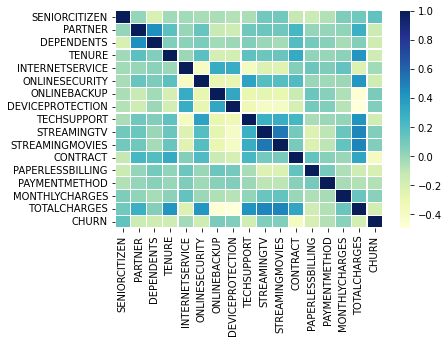

In [71]:
df_corr = dfdrop.apply(lambda x : pd.factorize(x)[0])
ax = sns.heatmap(df_corr.corr("spearman"), xticklabels=dfdrop.columns, yticklabels=dfdrop.columns, linewidths=.2,cmap="YlGnBu")

In [115]:
dfdrop= dfdrop.drop(['SENIORCITIZEN','MONTHLYCHARGES','PAYMENTMETHOD','PAPERLESSBILLING','DEPENDENTS'], axis=1)

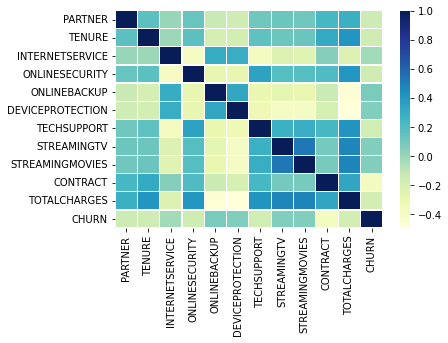

In [74]:
df_corr = dfdrop2.apply(lambda x : pd.factorize(x)[0])
ax = sns.heatmap(df_corr.corr("spearman"), xticklabels=dfdrop2.columns, yticklabels=dfdrop2.columns, linewidths=.2,cmap="YlGnBu")

In [79]:
#INTERNETSERVICE, CONTRACT, PAYMENTMETHOD
dfdrop['INTERNETSERVICE'].unique()
dfdrop['INTERNETSERVICE'] = dfdrop['INTERNETSERVICE'].replace('DSL', 1)
dfdrop['INTERNETSERVICE'] = dfdrop['INTERNETSERVICE'].replace('Fiber optic', 2)
dfdrop['INTERNETSERVICE'] = dfdrop['INTERNETSERVICE'].replace('No', 3)

In [82]:
dfdrop['CONTRACT'].unique()
dfdrop['CONTRACT'] = dfdrop['CONTRACT'].replace('Month-to-month', 1)
dfdrop['CONTRACT'] = dfdrop['CONTRACT'].replace('Two year', 2)
dfdrop['CONTRACT'] = dfdrop['CONTRACT'].replace('One year', 3)

In [85]:
dfdrop['PAYMENTMETHOD'].unique()
dfdrop['PAYMENTMETHOD'] = dfdrop['PAYMENTMETHOD'].replace('Credit card (automatic)', 1)
dfdrop['PAYMENTMETHOD'] = dfdrop['PAYMENTMETHOD'].replace('Electronic check', 2)
dfdrop['PAYMENTMETHOD'] = dfdrop['PAYMENTMETHOD'].replace('Mailed check', 3)
dfdrop['PAYMENTMETHOD'] = dfdrop['PAYMENTMETHOD'].replace('Bank transfer (automatic)', 4)

In [87]:
dfdrop['CHURN'].unique()


array([0, 1])

In [90]:
dfdrop.to_csv('churn.csv',index_label=None, index=False)

In [ ]:
!pip install -U scikit-learn==0.23.2 | tail -n 1
!pip install -U 'snapml>=1.7.4,<1.8.0' | tail -n 1

In [119]:
dfdrop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4548 entries, 0 to 4547
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   PARTNER           4548 non-null   category
 1   TENURE            4548 non-null   category
 2   INTERNETSERVICE   4548 non-null   category
 3   ONLINESECURITY    4548 non-null   category
 4   ONLINEBACKUP      4548 non-null   category
 5   DEVICEPROTECTION  4548 non-null   category
 6   TECHSUPPORT       4548 non-null   category
 7   STREAMINGTV       4548 non-null   category
 8   STREAMINGMOVIES   4548 non-null   category
 9   CONTRACT          4548 non-null   category
 10  TOTALCHARGES      4548 non-null   category
 11  CHURN             4548 non-null   int64   
dtypes: category(11), int64(1)
memory usage: 85.8 KB


In [120]:
dfdrop.columns

Index(['PARTNER', 'TENURE', 'INTERNETSERVICE', 'ONLINESECURITY',
       'ONLINEBACKUP', 'DEVICEPROTECTION', 'TECHSUPPORT', 'STREAMINGTV',
       'STREAMINGMOVIES', 'CONTRACT', 'TOTALCHARGES', 'CHURN'],
      dtype='object')

In [125]:
features = ['PARTNER', 'TENURE', 'INTERNETSERVICE', 'ONLINESECURITY',
       'ONLINEBACKUP', 'DEVICEPROTECTION', 'TECHSUPPORT', 'STREAMINGTV',
       'STREAMINGMOVIES', 'CONTRACT', 'TOTALCHARGES']
target = ['CHURN']

X = dfdrop[features]
y = dfdrop[target]


In [127]:
X

,PARTNER,TENURE,INTERNETSERVICE,ONLINESECURITY,ONLINEBACKUP,DEVICEPROTECTION,TECHSUPPORT,STREAMINGTV,STREAMINGMOVIES,CONTRACT,TOTALCHARGES
0,0,2,1,0,1,1,0,0,0,1,1
1,0,3,2,0,0,0,0,0,0,1,2
2,0,1,3,0,0,0,0,0,0,1,1
3,1,5,3,0,0,0,0,0,0,2,1
4,0,4,2,0,1,0,0,1,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...
4543,0,1,1,0,0,0,0,0,0,1,1
4544,0,1,2,0,0,0,0,0,0,1,1
4545,0,2,2,0,0,0,0,1,0,1,1
4546,1,4,3,0,0,0,0,0,0,2,1


In [128]:
from sklearn.model_selection import train_test_split
test_pct = 0.3 # Separaremos 30% dos dados para testes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_pct)


In [130]:
from snapml import SnapLogisticRegression
snap_logistic_regression = SnapLogisticRegression(
    class_weight="balanced",
    device_ids=np.array([0], dtype=np.uint32),
    n_jobs=2,
    random_state=33,
)

In [132]:
snap_logistic_regression.fit(X_train.values, y_train.values);

In [134]:
from sklearn.metrics import accuracy_score
y_pred = snap_logistic_regression.predict(X_test.values)
acc = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo (número de predições assertivas sobre número total de testes): {acc}")

Acurácia do modelo (número de predições assertivas sobre número total de testes): 0.7040293040293041


************************************** TRATAR AS TABELA RESPOSTA

In [142]:
#importar anwser
df_answer = pd.read_csv('https://raw.githubusercontent.com/maratonadev/desafio-5-2021/main/assets/data/ANSWERS.csv')

In [92]:
df = df_answer

In [94]:
df.drop(['GENDER','SENIORCITIZEN','MONTHLYCHARGES','PAYMENTMETHOD','PAPERLESSBILLING','DEPENDENTS'],axis=1, inplace=True)

In [96]:
df.drop(['ID'],axis=1,inplace=True)

In [97]:
df.isna().sum()

PARTNER             0
TENURE              0
PHONESERVICE        0
MULTIPLELINES       0
INTERNETSERVICE     0
ONLINESECURITY      0
ONLINEBACKUP        0
DEVICEPROTECTION    0
TECHSUPPORT         0
STREAMINGTV         0
STREAMINGMOVIES     0
CONTRACT            0
TOTALCHARGES        0
CHURN               0
dtype: int64

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324 entries, 0 to 1323
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   PARTNER           1324 non-null   object  
 1   TENURE            1324 non-null   category
 2   PHONESERVICE      1324 non-null   object  
 3   MULTIPLELINES     1324 non-null   object  
 4   INTERNETSERVICE   1324 non-null   object  
 5   ONLINESECURITY    1324 non-null   object  
 6   ONLINEBACKUP      1324 non-null   object  
 7   DEVICEPROTECTION  1324 non-null   object  
 8   TECHSUPPORT       1324 non-null   object  
 9   STREAMINGTV       1324 non-null   object  
 10  STREAMINGMOVIES   1324 non-null   object  
 11  CONTRACT          1324 non-null   object  
 12  TOTALCHARGES      1324 non-null   object  
 13  CHURN             1324 non-null   object  
dtypes: category(1), object(13)
memory usage: 136.1+ KB


In [101]:
df['ONLINESECURITY'] = df['ONLINESECURITY'].replace('No internet service', 'No')
df['MULTIPLELINES'] = df['MULTIPLELINES'].replace('No phone service', 'No')
df['ONLINEBACKUP'] = df['ONLINEBACKUP'].replace('No internet service','No')
df['DEVICEPROTECTION'] = df['DEVICEPROTECTION'].replace('No internet service','No')
df['TECHSUPPORT'] = df['TECHSUPPORT'].replace('No internet service','No')
df['STREAMINGTV'] = df['STREAMINGTV'].replace('No internet service','No')
df['STREAMINGMOVIES'] = df['STREAMINGMOVIES'].replace('No internet service','No')
df['TENURE'] = pd.cut(df['TENURE'], bins=5, labels=np.arange(1, 6, 1))



In [103]:
df['INTERNETSERVICE'] = df['INTERNETSERVICE'].replace('DSL', 1)
df['INTERNETSERVICE'] = df['INTERNETSERVICE'].replace('Fiber optic', 2)
df['INTERNETSERVICE'] = df['INTERNETSERVICE'].replace('No', 3)

df['CONTRACT'] = df['CONTRACT'].replace('Month-to-month', 1)
df['CONTRACT'] = df['CONTRACT'].replace('Two year', 2)
df['CONTRACT'] = df['CONTRACT'].replace('One year', 3)


In [106]:
df

,PARTNER,TENURE,PHONESERVICE,MULTIPLELINES,INTERNETSERVICE,ONLINESECURITY,ONLINEBACKUP,DEVICEPROTECTION,TECHSUPPORT,STREAMINGTV,STREAMINGMOVIES,CONTRACT,TOTALCHARGES,CHURN
0,No,1,Yes,No,3,No,No,No,No,No,No,1,90.809998,TO_FILL
1,No,4,Yes,No,3,No,No,No,No,No,No,2,979.599976,TO_FILL
2,Yes,5,Yes,Yes,2,Yes,Yes,No,No,No,Yes,3,6140.910156,TO_FILL
3,No,1,Yes,Yes,2,No,No,No,No,No,No,1,142.250000,TO_FILL
4,No,2,Yes,No,1,Yes,No,No,Yes,No,No,1,1398.949951,TO_FILL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1319,No,1,Yes,No,3,No,No,No,No,No,No,1,75.760002,TO_FILL
1320,Yes,5,Yes,Yes,2,No,Yes,Yes,No,Yes,Yes,2,6554.959961,TO_FILL
1321,Yes,5,Yes,Yes,2,No,No,Yes,Yes,Yes,Yes,1,6872.810059,TO_FILL
1322,No,1,Yes,No,2,No,Yes,No,No,No,No,1,747.880005,TO_FILL


In [105]:
df['TOTALCHARGES'] = pd.to_numeric(df['TOTALCHARGES'], downcast='float', errors='coerce')

In [107]:
df['TOTALCHARGES'] = pd.cut(df['TOTALCHARGES'], bins=5, labels=np.arange(1, 6, 1))

In [111]:
def convert_string(valor):
  if (valor == 'Yes'):
    return 1
  elif (valor == 'No'):
    return 0
  else:
    return valor  
for item in df.columns:
  df[item] = df[item].apply(convert_string)

In [137]:
df_features = df[['PARTNER', 'TENURE', 'INTERNETSERVICE', 'ONLINESECURITY',
       'ONLINEBACKUP', 'DEVICEPROTECTION', 'TECHSUPPORT', 'STREAMINGTV',
       'STREAMINGMOVIES', 'CONTRACT', 'TOTALCHARGES']]

In [138]:
y_pred = snap_logistic_regression.predict(df_features.values)
y_pred.shape

(1324,)

In [140]:
y_pred

array([1, 0, 0, ..., 1, 1, 0])

In [145]:
df_answer[['CHURN']] = y_pred

In [148]:
df_answer['CHURN'].unique()
df_answer['CHURN'].isna().sum()

0

In [150]:
df_answer.to_csv('answer.csv',index_label=None, index=False)